# 1. 编码器-解码器架构

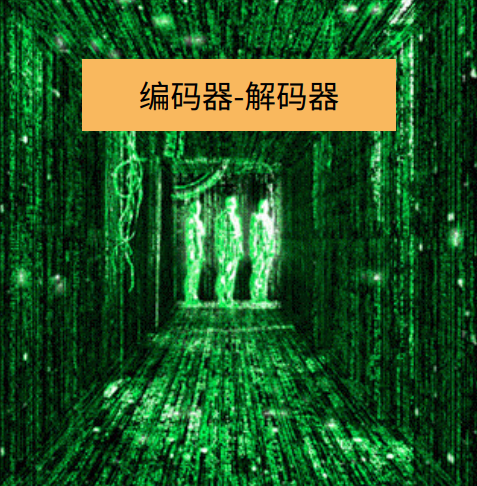

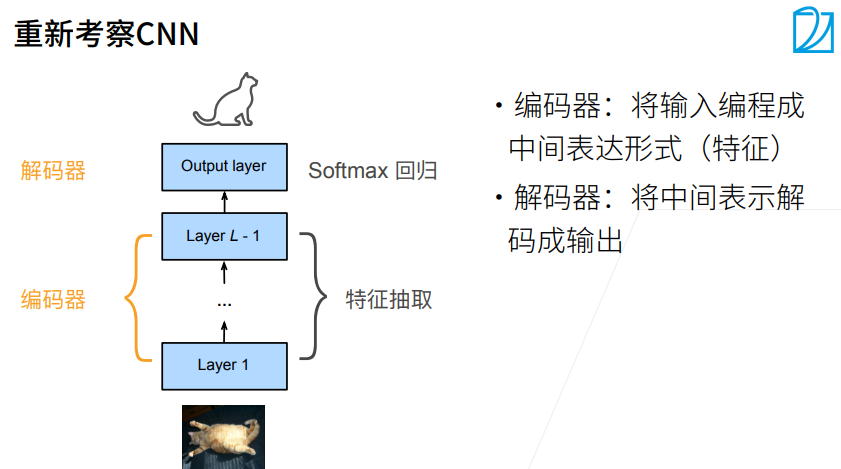

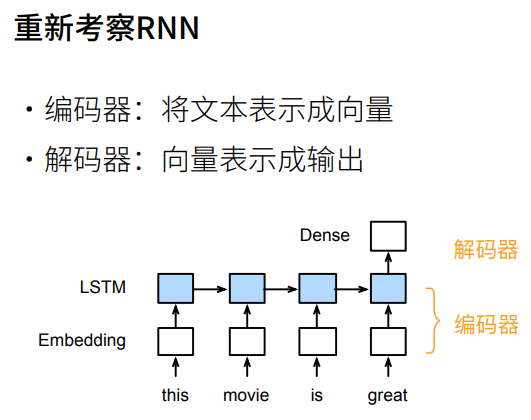

① 编码器处理输入，解码器生成输出。

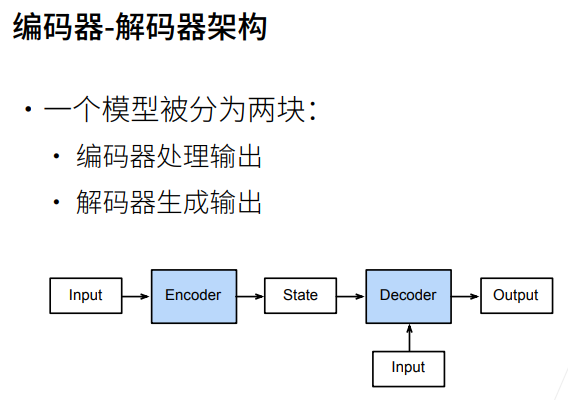

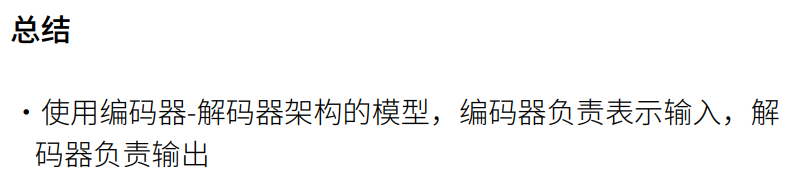

# 2. 编码器-解码器架构

In [1]:
# 编码器
from torch import nn

class Encoder(nn.Module):
    """编码器-解码器结构的基本编码器接口"""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)
    
    def forward(self, X, *args):
        raise NotImplementedError

In [2]:
# 解码器
class Decoder(nn.Module):
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)
            
    def init_state(self, enc_outputs, *args):  # 拿到编码器的输出enc_outputs
        raise NotImplementedError
        
    def forward(self, X, state):  # 拿到额外的输入X, state是用来不断更新的
        raise NotImplementedError

In [3]:
# 合并编码器和解码器
class EncoderDecoder(nn.Module):
    """编码器-解码器结构的基类"""
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, enc_X, dec_X, *args):
        # 相当于encoder获取正常输入，并输出中间状态
        # 然后decoder则是获取这个中间状态，并能够给出最终的输出
        enc_outputs = self.encoder(enc_X, *args)  # 先使用encoder，使用输入enc_X，并获得其返回值enc_outputs
        dec_state = self.decoder.init_state(enc_outputs, *args)  # 用encoder的返回值enc_outputs对decoder进行初始化，并获得dec_state
        dec_outputs = self.decoder(dec_X, dec_state)  # 再使用decoder，使用输入dec_X和上一步的dec_state，并获得最终的输出dec_outputs
        return dec_outputs